# 🚀 Prevendo o Valor Médio de Casas na Califórnia


In [1]:
import numpy as np  # Importa o NumPy, uma biblioteca fundamental para cálculos matemáticos e manipulação de arrays/matrizes.
import pandas as pd  # Importa o Pandas, uma biblioteca essencial para manipulação e análise de dados em estruturas como DataFrames.
import matplotlib.pyplot as plt  # Importa o Matplotlib, usado para criar gráficos e visualizações.
%matplotlib inline  # Configuração do Jupyter para exibir gráficos diretamente no notebook.
import seaborn as sns  # Importa o Seaborn, uma biblioteca baseada no Matplotlib para criar gráficos estatísticos mais bonitos e fáceis de usar.
sns.set_style('whitegrid')  # Define o estilo dos gráficos para 'whitegrid', adicionando grades leves em fundo branco para melhor visualização.


In [2]:
from sklearn.linear_model import LinearRegression  # Importa o modelo de regressão linear para problemas de regressão simples ou múltipla.
from sklearn.ensemble import RandomForestRegressor  # Importa o modelo de regressão baseado em florestas aleatórias (Random Forest), útil para problemas de regressão mais complexos.
from sklearn.linear_model import ElasticNet  # Importa o modelo Elastic Net, uma combinação de regressão Lasso e Ridge, útil para regularização e seleção de variáveis.
from sklearn.svm import SVR  # Importa o modelo de regressão vetorial de suporte (Support Vector Regression), útil para capturar relações complexas não lineares.
from sklearn.linear_model import Ridge  # Importa o modelo de regressão Ridge, usado para reduzir overfitting adicionando regularização L2.
from sklearn.linear_model import BayesianRidge  # Importa o modelo Bayesian Ridge, que aplica inferência bayesiana para obter distribuições sobre os parâmetros do modelo.

from sklearn.preprocessing import StandardScaler  # Importa a classe para padronizar (escalar) os dados, centralizando-os em torno de zero e ajustando a variância.
from sklearn.model_selection import train_test_split  # Importa a função para dividir os dados em conjuntos de treinamento e teste.
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error  # Importa métricas de avaliação para medir a performance dos modelos:
# - mean_absolute_error: erro absoluto médio, mede o quão longe as previsões estão das observações reais em média.
# - r2_score: coeficiente de determinação, mede o quão bem o modelo explica a variação dos dados.
# - mean_squared_error: erro quadrático médio, penaliza previsões que estão mais longe das observações reais.


In [25]:
chp = pd.read_csv('/Users/nayarasobral/Documents/TECH/Prevendo_valor_medio_de_casas_calorfornia/1553768847-housing.csv') 
chp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [26]:
chp.info()
# informações gerais de um dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [27]:
chp.isnull().sum()
# informacoes dos dados faltantes 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [28]:
chp['ocean_proximity'].unique()
# mostrar valores unico de uma coluna

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
chp['ocean_proximity'].value_counts()
# quantas linhas do dataset esta com cada valor de ocean_proximity  

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [30]:
# Criar o DataFrame
chp1 = pd.DataFrame({'ocean_proximity': ['NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN', 'ISLAND']})

# Aplicar pd.get_dummies e gerar os valores em 0 e 1
chp2 = pd.get_dummies(chp, columns=['ocean_proximity'], dtype=int)

print(chp2)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [36]:
chp2.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [39]:
chp2 = chp2[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'median_house_value']]
chp2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0,84700


In [41]:
# # Remover "ocean_proximity_" dos nomes das colunas
chp2 = chp2.rename(columns=lambda x: x.replace('ocean_proximity_', ''))
chp2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0,84700


Resolvendo valores faltantes


In [42]:
# Calcula o percentual de valores ausentes na coluna 'total_bedrooms'
# 207 é o número de valores ausentes (previamente identificado) e len(chp2) é o número total de registros no DataFrame.
(207 / len(chp2)) * 100  # Saída: Percentual de valores ausentes

1.002906976744186

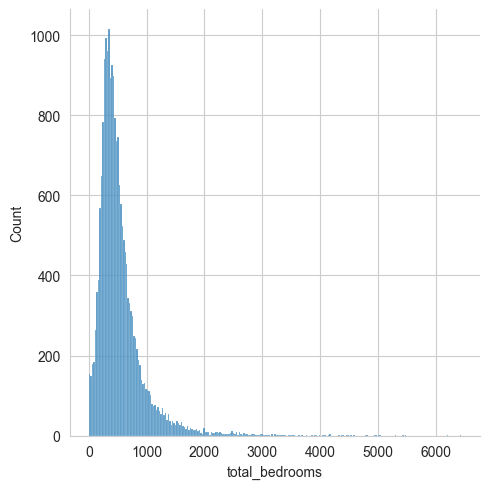

In [43]:
# Calcula o percentual de valores ausentes na coluna 'total_bedrooms'
# 207 é o número de valores ausentes (previamente identificado) e len(chp2) é o número total de registros no DataFrame.
(207 / len(chp2)) * 100  # Saída: Percentual de valores ausentes

# Visualiza a distribuição da coluna 'total_bedrooms' usando o Seaborn
# Isso ajuda a entender como os dados estão distribuídos e a decidir como tratar valores ausentes (ex.: média, mediana, etc.).
sns.displot(chp2['total_bedrooms'])  # Cria um histograma para visualizar a distribuição dos dados na coluna.


<Axes: xlabel='total_bedrooms'>

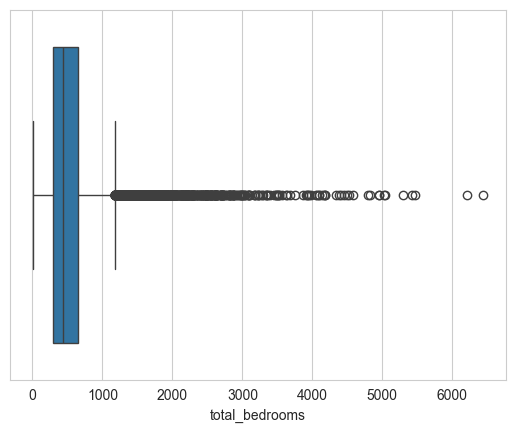

In [50]:
# Criar o boxplot na horizontal
sns.boxplot(data=chp2, x='total_bedrooms', orient='h')

In [46]:
chp2['total_bedrooms'].mean(), chp2['total_bedrooms'].median()

(np.float64(537.8705525375618), np.float64(435.0))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

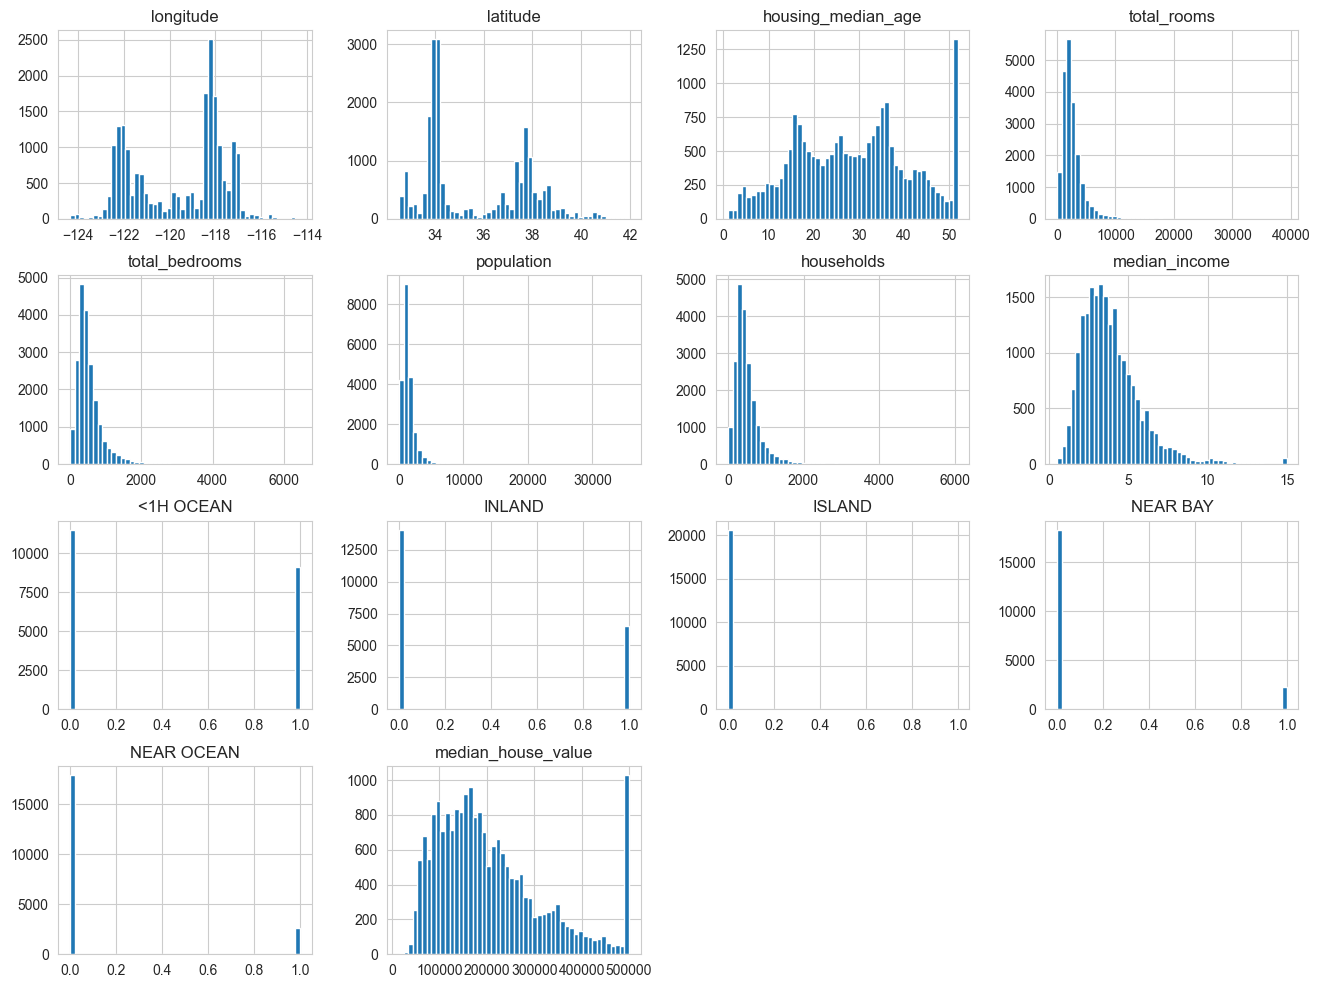

In [51]:
chp2.hist(figsize= (16, 12), bins = 50)

<Axes: >

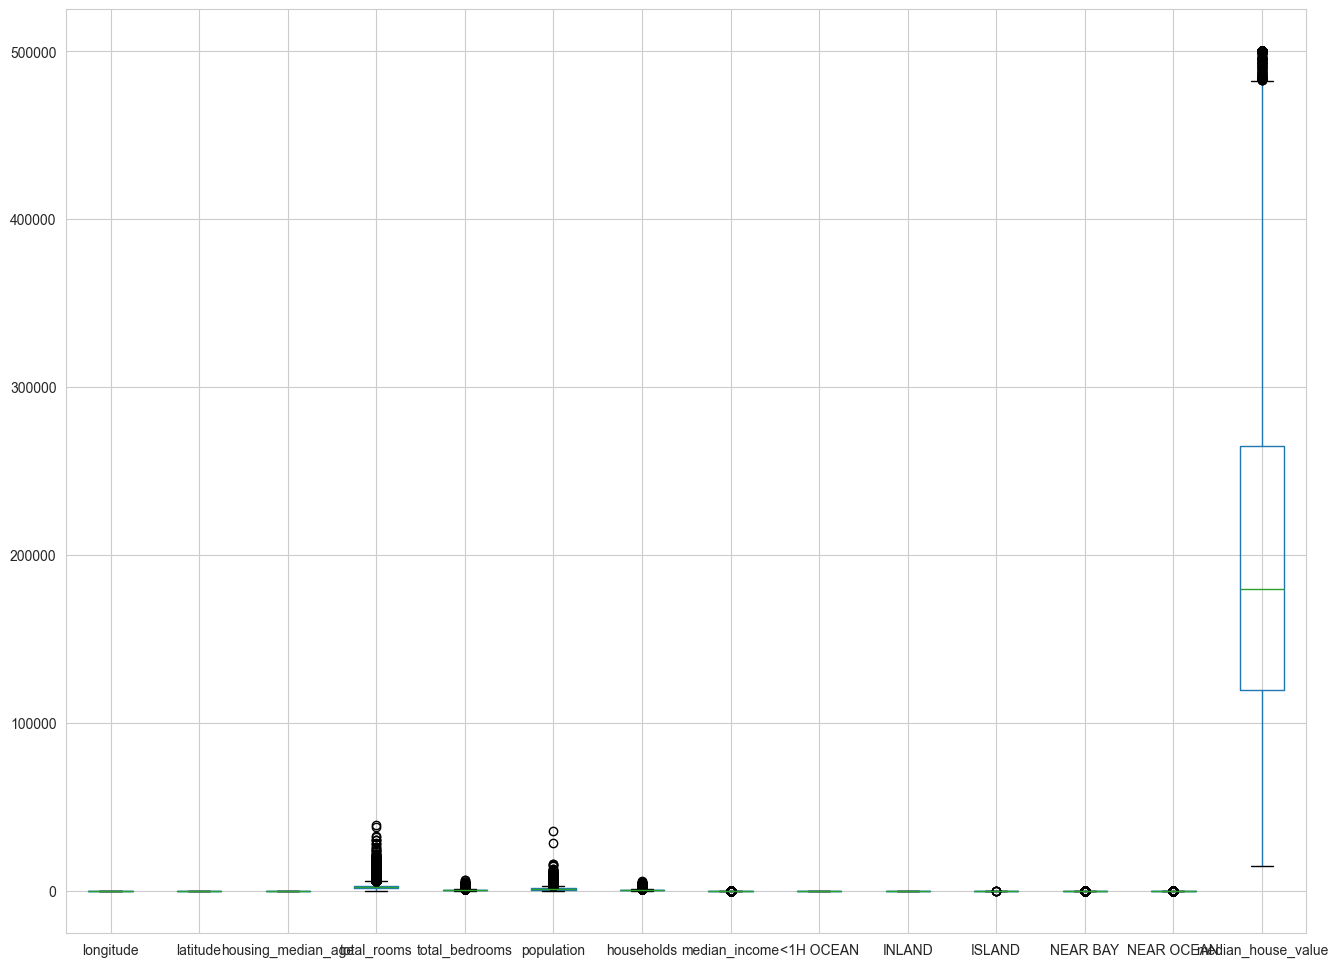

In [55]:
chp2.boxplot(figsize = (16, 12))

<Axes: >

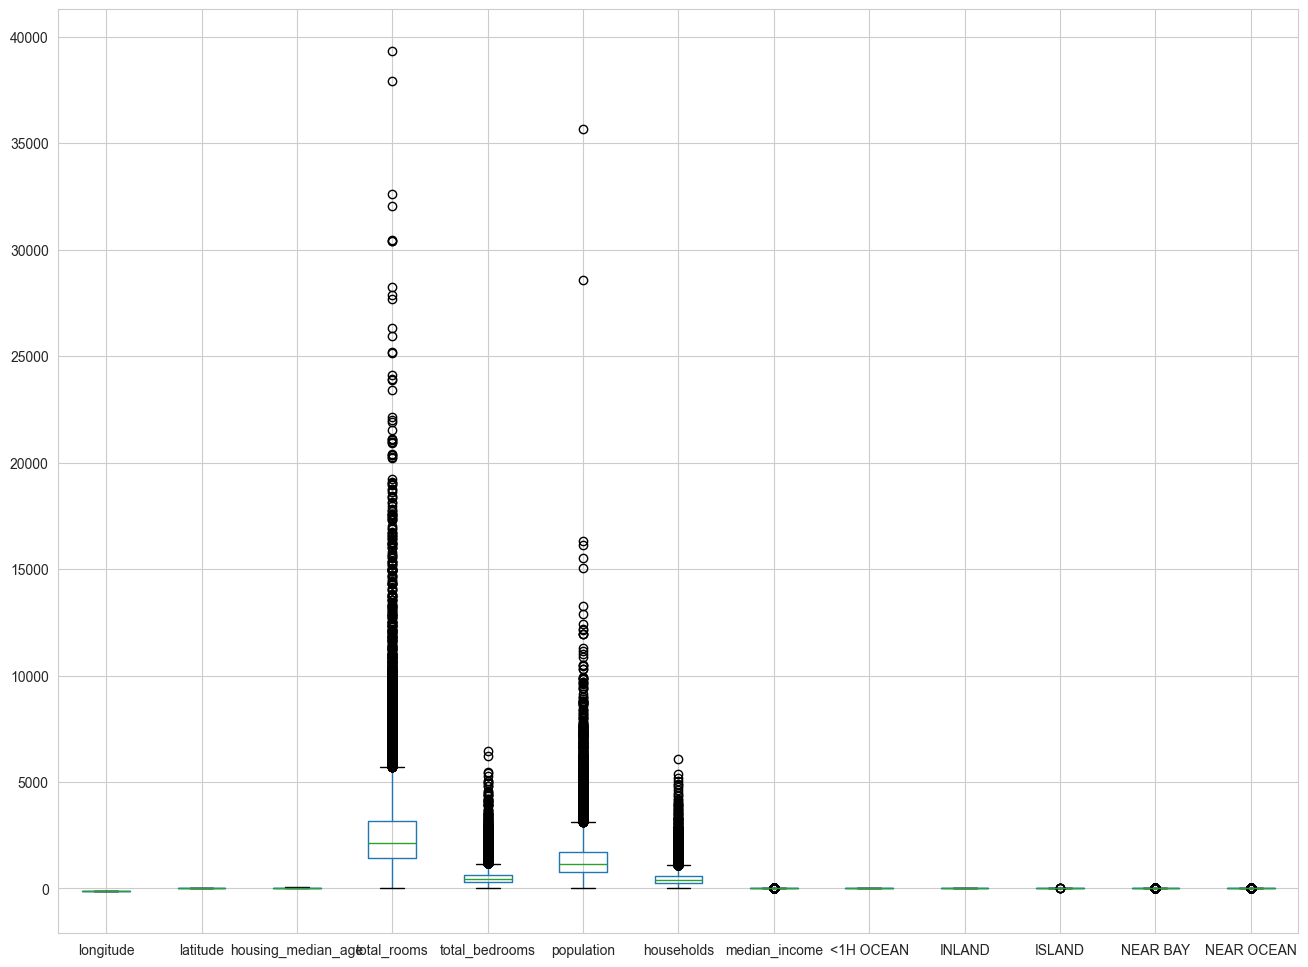

In [56]:
chp2.drop('median_house_value', axis = 1).boxplot(figsize= (16, 12))

<Axes: >

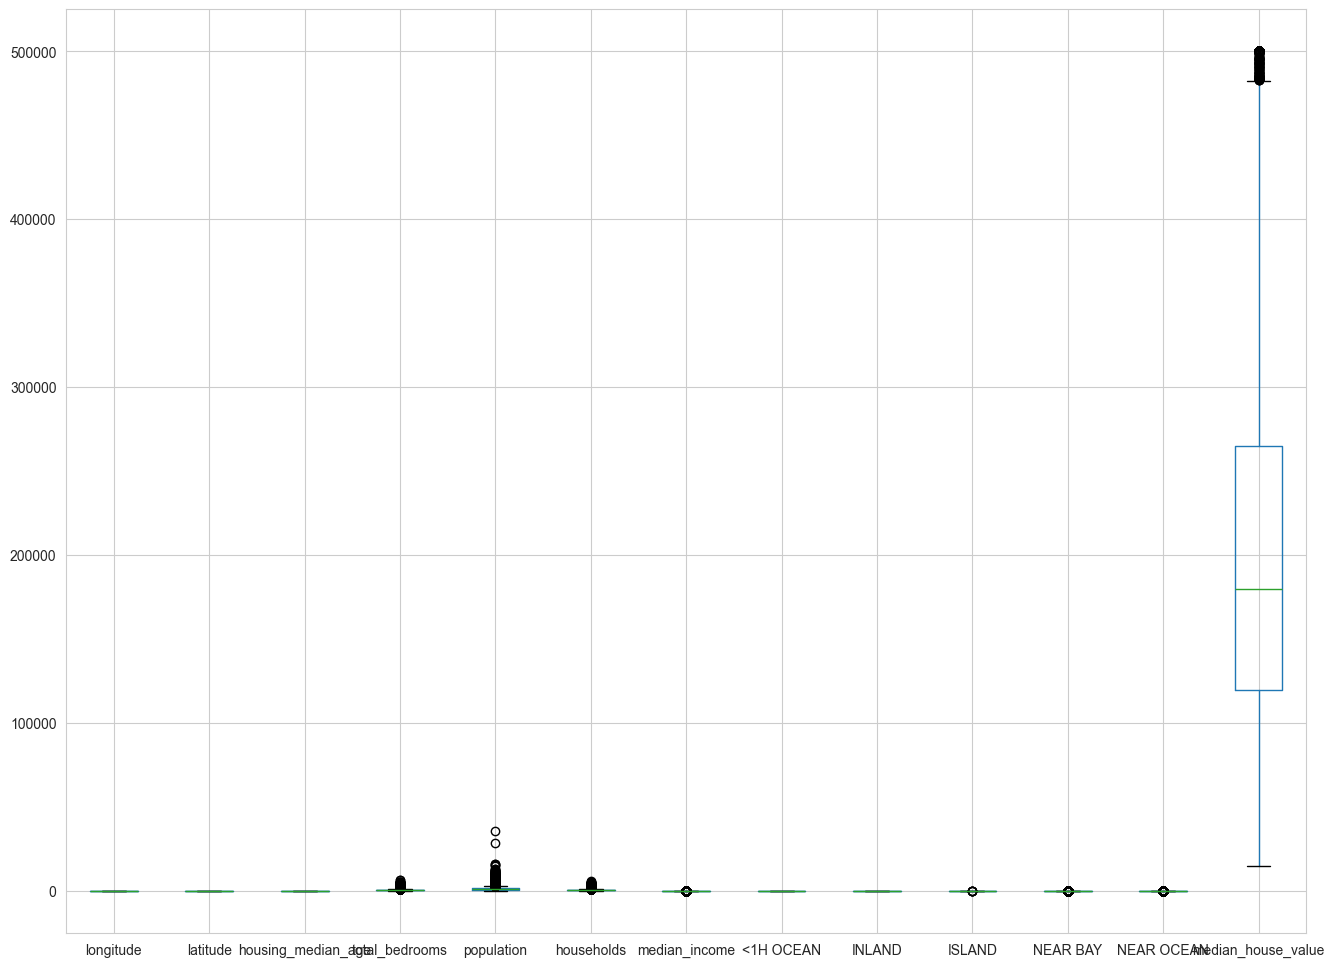

In [57]:
chp2.drop('total_rooms', axis = 1).boxplot(figsize= (16, 12))

In [58]:
# dropna() é usado para remover linhas com valores ausentes (NaN) no DataFrame chp2 e criar um novo
# DataFrame chamado chp3, que não contém esses valores.
chp3 = chp2.dropna()
chp3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0,84700


In [59]:
chp3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,0.442128,0.317917,0.000245,0.111095,0.128615,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,0.496652,0.465678,0.015641,0.314257,0.334782,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,0.000000,0.000000,0.000000,0.000000,0.000000,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,1.000000,1.000000,0.000000,0.000000,0.000000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [60]:
chp3.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,0.320831,-0.055337,0.009501,-0.474714,0.046185,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.446928,0.351084,-0.016662,0.358785,-0.161342,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.045553,-0.236968,0.017105,0.256149,0.020797,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.003777,0.026477,-0.007603,-0.023647,-0.008674,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,0.073450,-0.019602,-0.010451,-0.061480,-0.023498,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.041883,-0.038265,-0.009119,-0.011280,0.002106,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.168715,-0.237536,-0.009281,0.056677,0.027351,0.688355
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,0.257614
INLAND,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.607778,1.000000,-0.010681,-0.241356,-0.262289,-0.484787


<Axes: >

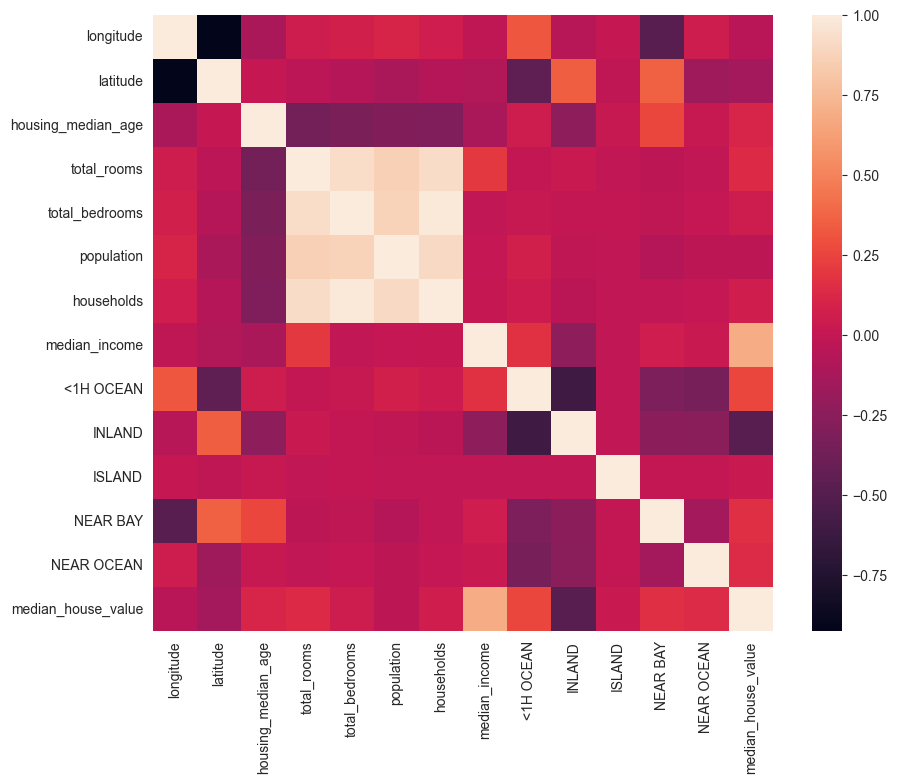

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(chp3.corr())

In [69]:
chp3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200


<Axes: xlabel='latitude', ylabel='longitude'>

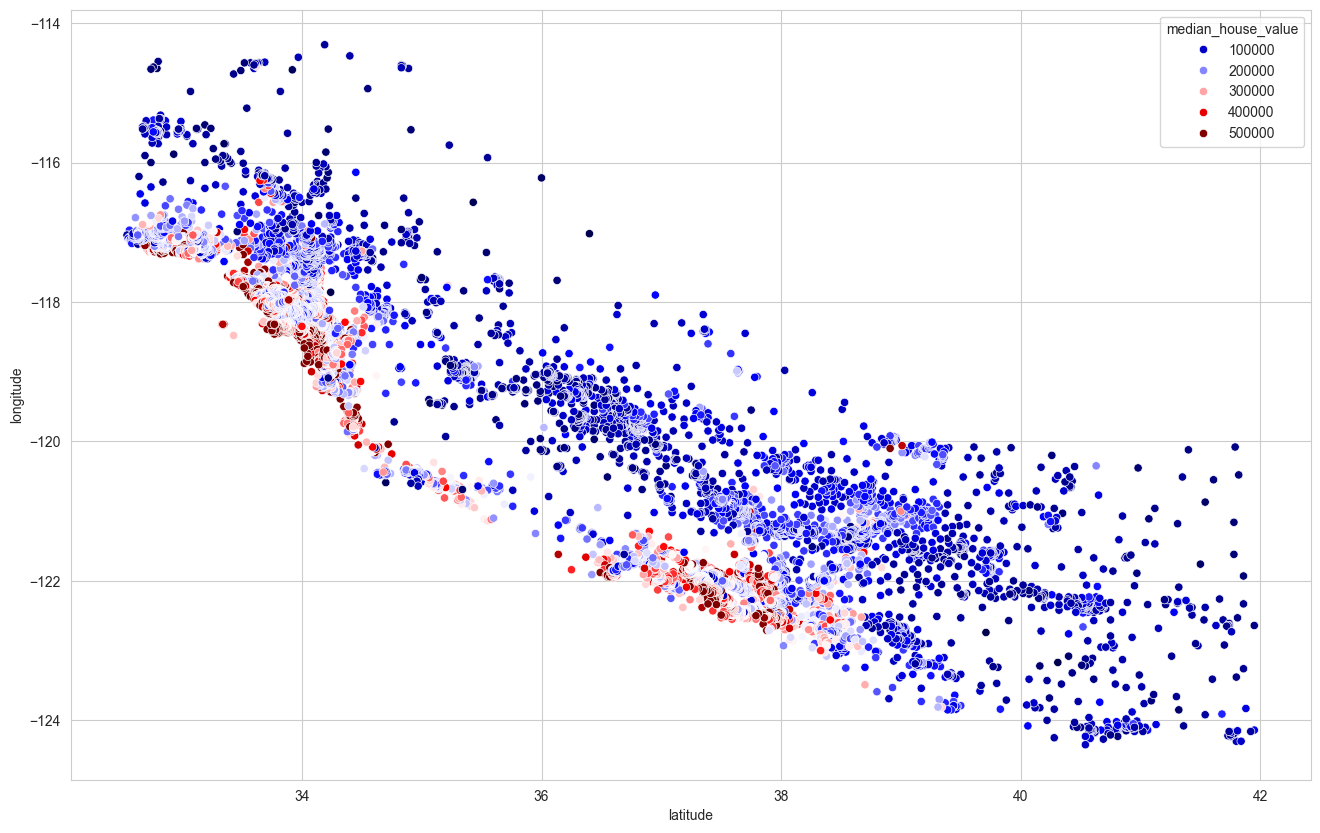

In [78]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = 'latitude', y = 'longitude', data = chp3, hue = 'median_house_value', palette = 'seismic')

In [83]:
chp3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

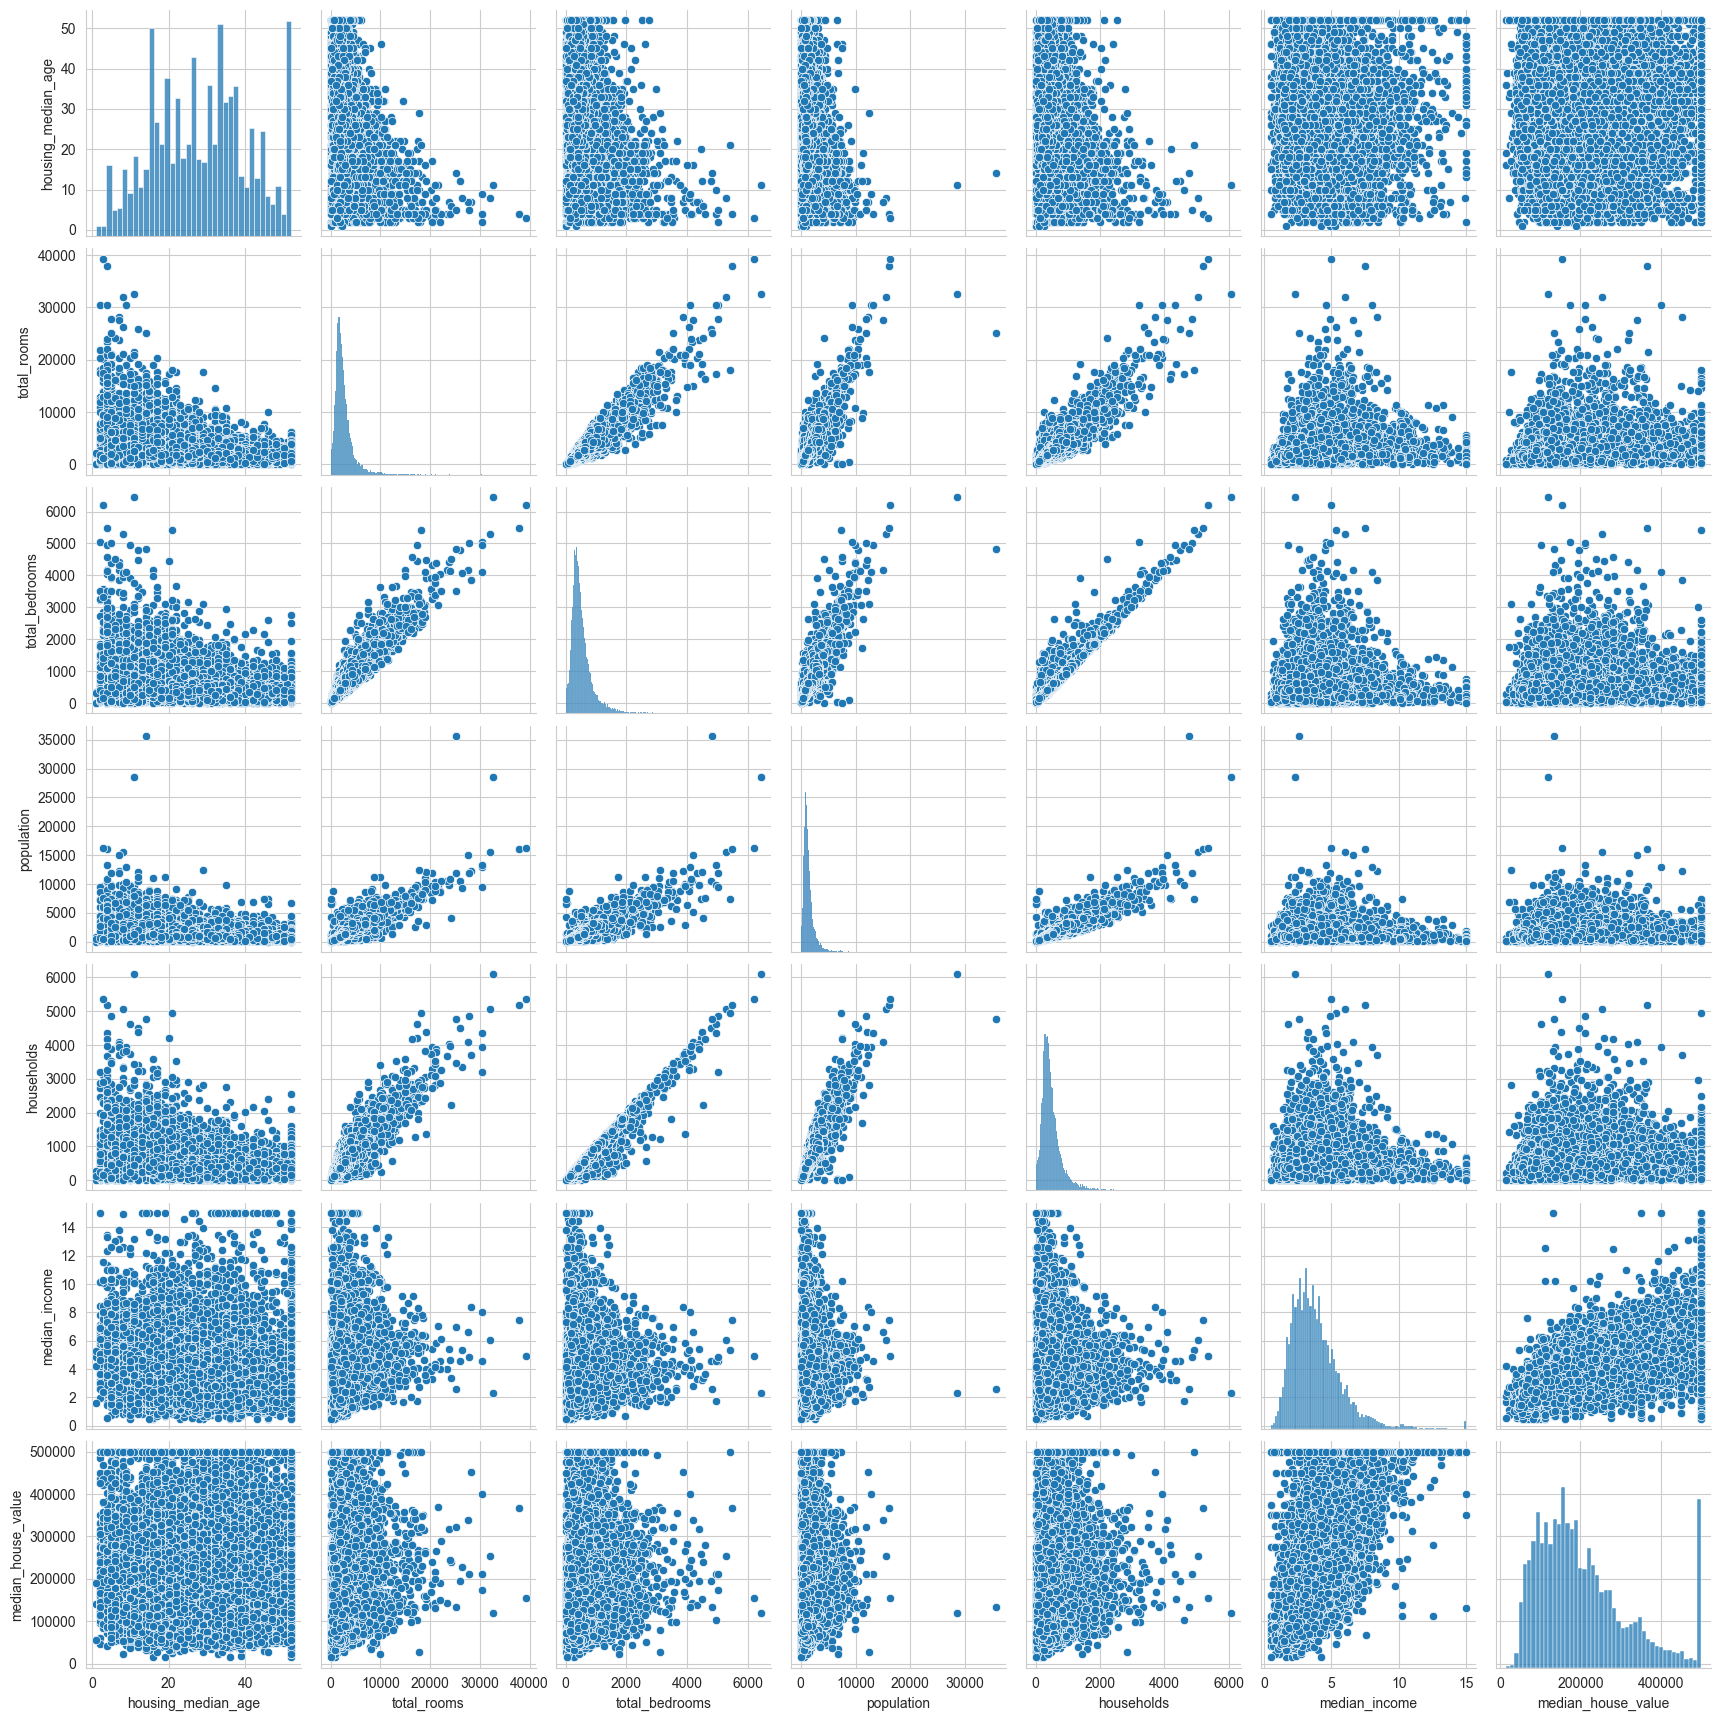

In [85]:
sns.pairplot(chp3[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

Essa linha separa todas as variáveis independentes (também chamadas de "features") que serão usadas como entrada para o modelo de aprendizado de máquina.
A coluna median_house_value é a variável alvo, então removemos essa coluna para que as entradas (x) não incluam o valor que queremos prever.

In [91]:
# Removendo a coluna median_house_value do DataFrame chp3 e cria um novo DataFrame chamado x.
x = chp3.drop('median_house_value', axis = 1)
# Seleciona a coluna median_house_value do DataFrame chp3 e a armazena na variável y.
y = chp3['median_house_value']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# 70% dos dados 
# 30% dos dados


In [109]:
linear = LinearRegression()
linear.fit(X_train, y_train)
predicao = linear.predict(X_test) 

In [110]:
linear.score(X_test, y_test) 

0.653875373567343

In [116]:
# Dicionário com diferentes modelos para serem treinados
modelos = {
    'LinearRegression': LinearRegression(),  # Regressão Linear
    'RandomForestRegressor': RandomForestRegressor(),  # Regressor baseado em árvores
    'ElasticNet': ElasticNet(),  # Combinação de Lasso e Ridge
    'SVR': SVR(),  # Regressão de Vetores de Suporte
    'Ridge': Ridge(),  # Regressão com regularização L2
    'BayesianRidge': BayesianRidge()  # Regressão Bayesiana
}

In [120]:
# Listas para armazenar os resultados
modelo_rmse = []  # Armazena o erro quadrático médio de cada modelo
modelo_r2 = []  # Armazena o coeficiente de determinação R² de cada modelo
modelo_nomes = []  # Armazena os nomes dos modelos

# Itera sobre cada modelo no dicionário
for nome, modelo in modelos.items():
    fit_modelo = modelo.fit(X_train, y_train)   # Treina o modelo nos dados de treino
    predicao = fit_modelo.predict(X_test)       # Faz previsões nos dados de teste

    modelo_r2.append(r2_score(y_test, predicao))    # Faz previsões nos dados de teste
    modelo_rmse.append(np.sqrt(mean_squared_error(y_test, predicao)))   # Calcula e armazena o RMSE (Raiz do Erro Quadrático Médio) para medir o erro
    modelo_nomes.append(nome)       # Armazena o nome do modelo atual


    resultado_final = pd.DataFrame([modelo_nomes, modelo_r2, modelo_rmse]).T # Cria um DataFrame com os resultados dos modelos

    resultado_final = resultado_final.rename(columns={0: 'Modelo', 1: 'R2', 2: 'RMSE'}).sort_values(by = 'RMSE')

resultado_final 

    # Adicione aqui métricas como cálculo de RMSE ou R² após o treino

,Modelo,R2,RMSE
1,RandomForestRegressor,0.820614,48901.758503
4,Ridge,0.654042,67911.286812
0,LinearRegression,0.653875,67927.638042
5,BayesianRidge,0.653714,67943.482974
2,ElasticNet,0.622703,70920.53411
3,SVR,-0.045737,118070.498847
